In [1]:
import pandas as pd
import numpy as np
import random
import scipy.stats
import math
import seaborn as sns
from matplotlib import pyplot as plt
from random import sample
from scipy.stats import chisquare
from scipy.stats import geom
from scipy.stats import t
from scipy import stats
z90 = 1.645
z95 = 1.96
z99 = 2.576
%matplotlib inline

CONFIDENCE INTERVAL
a) standard error = 1.9535, me = 4.5048, dof = 8, t_conf = 2.3060
b) we're 95% confident that the real difference between the pumping capacity averages of ESCs and control groups
is between 3.3252 and 12.3348
c) .


C:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\patches.py:121: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


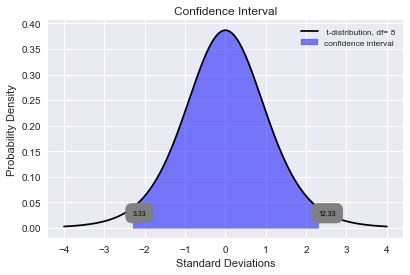

In [3]:
# confidence interval for a difference of means
# example 7.21, 7:22, 

# ESCs
n1 = 9
xbar1 = 3.50
s1 = 5.17
# control
n2 = 9
xbar2 = -4.33
s2 = 2.76
n = 9

xbar = xbar1 - xbar2
cl = .95
sl = 1-cl
dof = n-1

# CONFIDENCE INTERVAL
fig = plt.figure(figsize=(14,4))
x = np.linspace(-4, 4, 500)
s1t = sl / 2
t_conf = stats.t.ppf(1-s1t, dof) # upper tail is 1 - confidence level /2 (one tail)
se = np.sqrt((s1**2/n1) +(s2**2/n2))
me = t_conf * se
lo = xbar - me
hi = xbar + me
print('''CONFIDENCE INTERVAL
a) standard error = {se:.4f}, me = {me:.4f}, dof = {dof}, t_conf = {t_conf:.4f}
b) we're {cl:.0%} confident that the real difference between the pumping capacity averages of ESCs and control groups
is between {lo:.4f} and {hi:.4f}
c) .'''
.format(cl=cl,se=se,me=me,lo=lo,hi=hi,dof=dof,t_conf=t_conf))

ax_conf = fig.add_subplot(1,2,2)
y = stats.t.pdf(x, dof)
two_t_conf = [t_conf, (t_conf)*-1]

ax_conf.plot(x, y, color='black',label=f' t-distribution, df= {dof}'.format(df=dof))
ax_conf.fill_between(x, y, color='blue', alpha=0.5, where= ~((x<min(two_t_conf)) | (x>max(two_t_conf))) ,label="confidence interval")
ax_conf.set_ylabel('Probability Density')
ax_conf.set_xlabel('Standard Deviations')
ax_conf.set_title('Confidence Interval')
ax_conf.text(min(two_t_conf), stats.t.cdf(x=min(two_t_conf), df=dof), '{t_lo:.2f}'.format(t_lo=lo), color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1', color='gray'),fontsize='x-small')
ax_conf.text(max(two_t_conf), stats.t.cdf(x=min(two_t_conf), df=dof), '{t_hi:.2f}'.format(t_hi=hi), color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1', color='gray'),fontsize='x-small')
legend = ax_conf.legend(shadow=True,fontsize='small')

In [40]:
'''
Prepare. Retrieve critical contextual information, and if appropriate, set up hypotheses.
Check. Ensure the required conditions are reasonably satisfied.
Calculate. Find the standard error, and then construct a condfience interval, or if conducting a
hypothesis test, find a test statistic and p-value.
Conclude. Interpret the results in the context of the application.'''

'\nPrepare. Retrieve critical contextual information, and if appropriate, set up hypotheses.\nCheck. Ensure the required conditions are reasonably satisfied.\nCalculate. Find the standard error, and then construct a condfience interval, or if conducting a\nhypothesis test, find a test statistic and p-value.\nConclude. Interpret the results in the context of the application.'

PREPARE: parameter of interest: difference in smoker and nonsmoker mothers' average infant weights. 
xbar = 0.39999999999999947, s = [ 1.43  1.6 ], n = 150, dof = 149
H0:  there's no difference in smoker and nonsmoker mothers' average infant weights  u_1 - u_2 = 0
HA:  there's difference in smoker and nonsmoker mothers' average infant weights  u_1 - u_2 != 0
significance level: 0.05
CHECK.
independence: data comes from a simple random sample. independence condition satisfies.
normality: as seen in the histograms below, since the n is bigger than 30 and there's no particularly extreme outliers,
the data distributed normally. 
CALCULATE.
se = 0.2579, t* = 1.55
CONCLUDE: 
Since p = 0.1230 and it's bigger than our 0.05 significance level, we reject the null hypothesis and conclude 
the data does not provide strong evidence to accept the notion that there's a difference in smoker and nonsmoker mothers'
average infant weights.


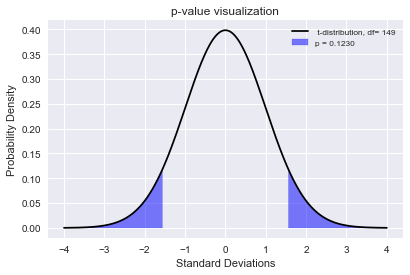

In [5]:
# example 7.23

xbars = np.array([6.78,7.18])
std = np.array([1.43,1.60])
size = np.array([50,100])
n = sum(size)
xbar = max(xbars) - min(xbars) # difference of two means

x0 = 0 # null value
cl = .95 # confidence level
sl = 1-cl # significance level
s1t = sl/2 # significance level in one tail
dof = n-1 # degrees of freedom

se = np.sqrt(sum(std**2/size)) # standard error, extended
t = (xbar - x0) / se # compute t-score
two_t = [t,t*(-1)] # t-scores for right and left tail
p1t = stats.t.cdf(x=min(two_t), df=dof) # one tail probability -left tail-
p = stats.t.cdf(x=min(two_t), df=dof) * 2 # two tailed p-value of corresponding t-score

#PREPARE
poi = '''difference in smoker and nonsmoker mothers' average infant weights'''
h0 = ''' there's no difference in smoker and nonsmoker mothers' average infant weights '''
ha = ''' there's difference in smoker and nonsmoker mothers' average infant weights '''

print('''PREPARE: parameter of interest: {poi}. 
xbar = {xbar}, s = {s}, n = {n}, dof = {dof}
H0: {h0} u_1 - u_2 = {x0}
HA: {ha} u_1 - u_2 != {x0}
significance level: {sl:.2f}'''
.format(xbar=xbar,s=std,n=n,dof=dof,sl=sl,x0=x0,h0=h0,ha=ha,poi=poi))

print('''CHECK.
independence: data comes from a simple random sample. independence condition satisfies.
normality: as seen in the histograms below, since the n is bigger than 30 and there's no particularly extreme outliers,
the data distributed normally. ''')

print('''CALCULATE.
se = {se:.4f}, t* = {t:.2f}
CONCLUDE: 
Since p = {p:.4f} and it's bigger than our {sl:.2f} significance level, we reject the null hypothesis and conclude 
the data does not provide strong evidence to accept the notion that there's a difference in smoker and nonsmoker mothers'
average infant weights.'''
.format(sl=sl,p=p,se=se,t=t))

# viz
fig = plt.figure(figsize=(14,4))
x = np.linspace(-4, 4, 500)
ax = fig.add_subplot(1,2,1)
y = stats.t.pdf(x, dof)
ax.plot(x, y, color='black',label=f' t-distribution, df= {dof}'.format(df=dof))
ax.fill_between(x, y, color='blue', alpha=0.5, where=(x<min(two_t)) | (x>max(two_t)),label="p = {:.4f}".format(p))
ax.set_ylabel('Probability Density')
ax.set_xlabel('Standard Deviations')
ax.set_title('p-value visualization')
legend = ax.legend(shadow=True,fontsize='small')

PREPARE: parameter of interest: difference in smoker and nonsmoker mothers' average infant weights. 
xbar = 5.300000000000011, s = [14 20], n = 57, dof = 56
H0:  there's no difference in smoker and nonsmoker mothers' average infant weights  u_1 - u_2 = 0
HA:  there's difference in smoker and nonsmoker mothers' average infant weights  u_1 - u_2 != 0
significance level: 0.05
CHECK.
independence: data comes from a simple random sample. independence condition satisfies.
normality: as seen in the histograms below, since the n is bigger than 30 and there's no particularly extreme outliers,
the data distributed normally. 
CALCULATE.
se = 4.6204, t* = 1.15
CONCLUDE: 
Since p = 0.2562 and it's bigger than our 0.05 significance level, we reject the null hypothesis and conclude 
the data does not provide strong evidence to accept the notion that there's a difference in smoker and nonsmoker mothers'
average infant weights.


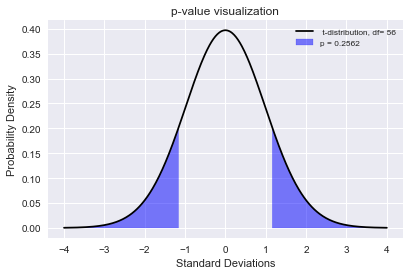

In [6]:
# CASE STUDY, 7.3.3

xbars = np.array([79.4,74.1])
std = np.array([14,20])
size = np.array([30,27])
n = sum(size)
xbar = max(xbars) - min(xbars) # difference of two means

x0 = 0 # null value
cl = .99 # confidence level
sl = 1-cl # significance level
s1t = sl/2 # significance level in one tail
dof = n-1 # degrees of freedom

se = np.sqrt(sum(std**2/size)) # standard error, extended
t = (xbar - x0) / se # compute t-score
two_t = [t,t*(-1)] # t-scores for right and left tail
p1t = stats.t.cdf(x=min(two_t), df=dof) # one tail probability -left tail-
p = stats.t.cdf(x=min(two_t), df=dof) * 2 # two tailed p-value of corresponding t-score

#PREPARE
poi = '''difference in smoker and nonsmoker mothers' average infant weights'''
h0 = ''' there's no difference in smoker and nonsmoker mothers' average infant weights '''
ha = ''' there's difference in smoker and nonsmoker mothers' average infant weights '''

print('''PREPARE: parameter of interest: {poi}. 
xbar = {xbar}, s = {s}, n = {n}, dof = {dof}
H0: {h0} u_1 - u_2 = {x0}
HA: {ha} u_1 - u_2 != {x0}
significance level: {sl:.2f}'''
.format(xbar=xbar,s=std,n=n,dof=dof,sl=sl,x0=x0,h0=h0,ha=ha,poi=poi))

print('''CHECK.
independence: data comes from a simple random sample. independence condition satisfies.
normality: as seen in the histograms below, since the n is bigger than 30 and there's no particularly extreme outliers,
the data distributed normally. ''')

print('''CALCULATE.
se = {se:.4f}, t* = {t:.2f}
CONCLUDE: 
Since p = {p:.4f} and it's bigger than our {sl:.2f} significance level, we reject the null hypothesis and conclude 
the data does not provide strong evidence to accept the notion that there's a difference in smoker and nonsmoker mothers'
average infant weights.'''
.format(sl=sl,p=p,se=se,t=t))

# viz
fig = plt.figure(figsize=(14,4))
x = np.linspace(-4, 4, 500)
ax = fig.add_subplot(1,2,1)
y = stats.t.pdf(x, dof)
ax.plot(x, y, color='black',label=f' t-distribution, df= {dof}'.format(df=dof))
ax.fill_between(x, y, color='blue', alpha=0.5, where=(x<min(two_t)) | (x>max(two_t)),label="p = {:.4f}".format(p))
ax.set_ylabel('Probability Density')
ax.set_xlabel('Standard Deviations')
ax.set_title('p-value visualization')
legend = ax.legend(shadow=True,fontsize='small')

               mean       std  count
habit                               
nonsmoker  7.186496  1.396227    117
smoker     6.572424  1.121918     33
0.614071484071
PREPARE: parameter of interest: difference in smoker and nonsmoker mothers' average infant weights. 
xbar = 0.6140714840714825, s = [ 1.12191808  1.39622725], n = 150, dof = 149
H0:  there's no difference in smoker and nonsmoker mothers' average infant weights  u_1 - u_2 = 0
HA:  there's difference in smoker and nonsmoker mothers' average infant weights  u_1 - u_2 != 0
significance level: 0.05
CHECK.
independence: data comes from a simple random sample. independence condition satisfies.
normality: as seen in the histograms below, since the n is bigger than 30 and there's no particularly extreme outliers,
the data distributed normally. 
CALCULATE.
se = 0.2341, t* = 2.62
CONCLUDE: 
Since p = 0.0096 and it's lower than our 0.05 significance level, we reject the null hypothesis and conclude 
there's a difference in smoker and non

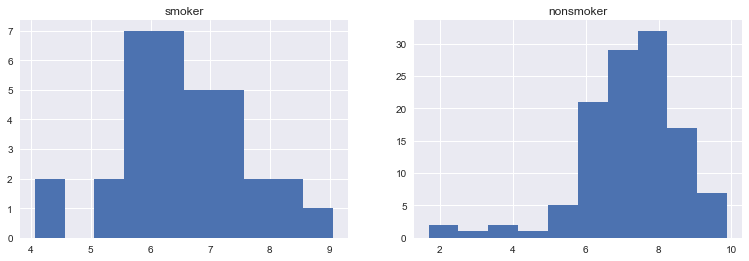

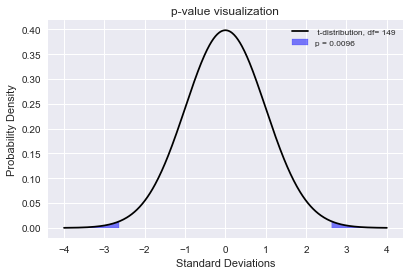

In [17]:
# DIFFERENCE OF MEANS HYPOTHESIS TEST

ncbirths = pd.read_csv("data/ncbirths.csv", na_values = "null") # read the data
ncbirths_sample = ncbirths.sample(frac=.15,random_state=178) # take samples from the entire dataset, simple random sample
#ncbirths_sample[group_name].value_counts() # additional step to run

group_name = "habit"
outcome_name = "weight"

# summarizing the sample for means, standard deviations and group sample sizes
summ = ncbirths_sample[[outcome_name,group_name]].groupby(group_name).agg({outcome_name:["mean","std","count"]})[outcome_name]

groups = ncbirths_sample[group_name].unique() # the groups in our dataset in a list
group_size = len(groups) # how many groups that we have
n = len(ncbirths_sample[group_name]) # there are multiple n's in different groups but this is the whole data set's sample size
xbars = list() # multiple point estimates for different groups
std = list() # multiple standard deviations for different groups
size = list() # multiple sample sizes for different groups
for i in range(group_size):
    xbars.append(summ["mean"][groups[i]]) # append every group's mean to list
    std.append(summ["std"][groups[i]]) # append every group's standard deviation to list
    size.append(summ["count"][groups[i]]) # append every group's sample size to list
print(summ)
# converting to array for easier calculations
xbars = np.array(xbars)
std = np.array(std)
size = np.array(size)
xbar = max(xbars) - min(xbars) # difference of two means
print(xbar)

x0 = 0 # null value
cl = .95 # confidence level
sl = 1-cl # significance level
s1t = sl/2 # significance level in one tail
dof = n-1 # degrees of freedom

se = np.sqrt(sum(std**2/size)) # standard error, extended
t = (xbar - x0) / se # compute t-score
two_t = [t,t*(-1)] # t-scores for right and left tail
p1t = stats.t.cdf(x=min(two_t), df=dof) # one tail probability -left tail-
p = stats.t.cdf(x=min(two_t), df=dof) * 2 # two tailed p-value of corresponding t-score

#PREPARE
poi = '''difference in smoker and nonsmoker mothers' average infant weights'''
h0 = ''' there's no difference in smoker and nonsmoker mothers' average infant weights '''
ha = ''' there's difference in smoker and nonsmoker mothers' average infant weights '''

print('''PREPARE: parameter of interest: {poi}. 
xbar = {xbar}, s = {s}, n = {n}, dof = {dof}
H0: {h0} u_1 - u_2 = {x0}
HA: {ha} u_1 - u_2 != {x0}
significance level: {sl:.2f}'''
.format(xbar=xbar,s=std,n=n,dof=dof,sl=sl,x0=x0,h0=h0,ha=ha,poi=poi))

print('''CHECK.
independence: data comes from a simple random sample. independence condition satisfies.
normality: as seen in the histograms below, since the n is bigger than 30 and there's no particularly extreme outliers,
the data distributed normally. ''')
fig_hist = plt.figure(figsize=(20,4))
for i in range(group_size):
    ax_hist = fig_hist.add_subplot(1,group_size+1,i+1)
    plt.hist(data=ncbirths_sample[ncbirths_sample[group_name] == groups[i]][[group_name,outcome_name]],x=outcome_name)
    plt.title(groups[i])
    
print('''CALCULATE.
se = {se:.4f}, t* = {t:.2f}
CONCLUDE: 
Since p = {p:.4f} and it's lower than our {sl:.2f} significance level, we reject the null hypothesis and conclude 
there's a difference in smoker and nonsmoker mothers' average infant weights.'''
.format(sl=sl,p=p,se=se,t=t))

# viz
fig = plt.figure(figsize=(14,4))
x = np.linspace(-4, 4, 500)
ax = fig.add_subplot(1,2,1)
y = stats.t.pdf(x, dof)
ax.plot(x, y, color='black',label=f' t-distribution, df= {dof}'.format(df=dof))
ax.fill_between(x, y, color='blue', alpha=0.5, where=(x<min(two_t)) | (x>max(two_t)),label="p = {:.4f}".format(p))
ax.set_ylabel('Probability Density')
ax.set_xlabel('Standard Deviations')
ax.set_title('p-value visualization')
legend = ax.legend(shadow=True,fontsize='small')